## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
columns = ['Date', 'Tag', 'Posts']
df = pd.read_csv("QueryResults.csv", header=0, names=columns)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [5]:
df.tail()

,Date,Tag,Posts
2337,2022-08-01 00:00:00,php,4600
2338,2022-08-01 00:00:00,python,24603
2339,2022-08-01 00:00:00,r,4646
2340,2022-08-01 00:00:00,ruby,499
2341,2022-08-01 00:00:00,swift,1951


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2342, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [11]:
df.count()

Date     2342
Tag      2342
Posts    2342
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
df.groupby('Tag').sum()

,Posts
Tag,
assembly,41006
c,384185
c#,1555283
c++,774436
delphi,49967
go,63866
java,1861937
javascript,2416628
perl,67069


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [13]:
df.groupby('Tag').count()

,Date,Posts
Tag,,
assembly,169,169
c,169,169
c#,170,170
c++,169,169
delphi,169,169
go,154,154
java,169,169
javascript,169,169
perl,169,169


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [14]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


In [16]:
type(df.Date[1])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [18]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts')

In [22]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [19]:
reshaped_df.shape

(170, 14)

In [20]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,159.0,NaN


In [21]:
reshaped_df.tail()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2022-04-01,266.0,1869.0,5931.0,3846.0,122.0,756.0,7824.0,15953.0,100.0,3808.0,23557.0,4770.0,492.0,1769.0
2022-05-01,287.0,1915.0,6291.0,3890.0,129.0,677.0,7861.0,16084.0,94.0,4022.0,23166.0,4840.0,502.0,1758.0
2022-06-01,247.0,1667.0,6119.0,3400.0,125.0,742.0,7076.0,15275.0,125.0,3858.0,22355.0,4415.0,482.0,1800.0
2022-07-01,213.0,1513.0,6013.0,3304.0,126.0,753.0,6672.0,15359.0,131.0,3828.0,22708.0,4216.0,457.0,1781.0
2022-08-01,204.0,1680.0,7001.0,3746.0,147.0,962.0,7651.0,17543.0,134.0,4600.0,24603.0,4646.0,499.0,1951.0


In [23]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,159.0,0.0


In [24]:
reshaped_df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [25]:
reshaped_df.count()

Tag
assembly      170
c             170
c#            170
c++           170
delphi        170
go            170
java          170
javascript    170
perl          170
php           170
python        170
r             170
ruby          170
swift         170
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

columns = ['Date', 'Tag', 'Posts']
df = pd.read_csv("QueryResults.csv", header=0, names=columns)
df.Date = pd.to_datetime(df.Date)
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts')
reshaped_df.fillna(0, inplace=True)

In [6]:
reshaped_df.java

Date
2008-07-01       0.0
2008-08-01     222.0
2008-09-01    1133.0
2008-10-01    1149.0
2008-11-01     957.0
               ...  
2022-04-01    7824.0
2022-05-01    7861.0
2022-06-01    7076.0
2022-07-01    6672.0
2022-08-01    7651.0
Name: java, Length: 170, dtype: float64

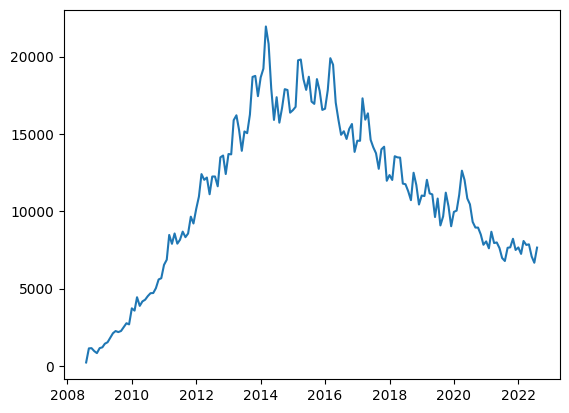

In [9]:
plt.plot('Date', 'Posts', data=df[df.Tag.isin(['java'])])

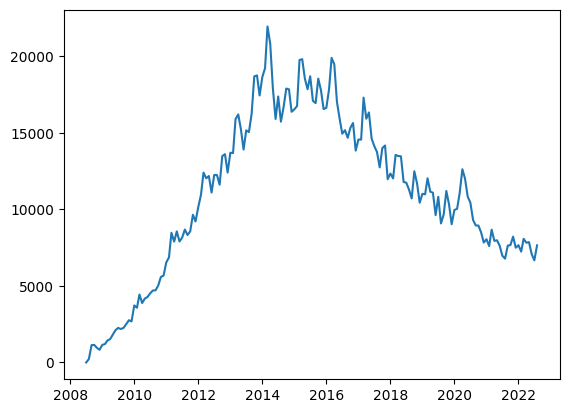

In [10]:
plt.plot(reshaped_df.index, reshaped_df.java)

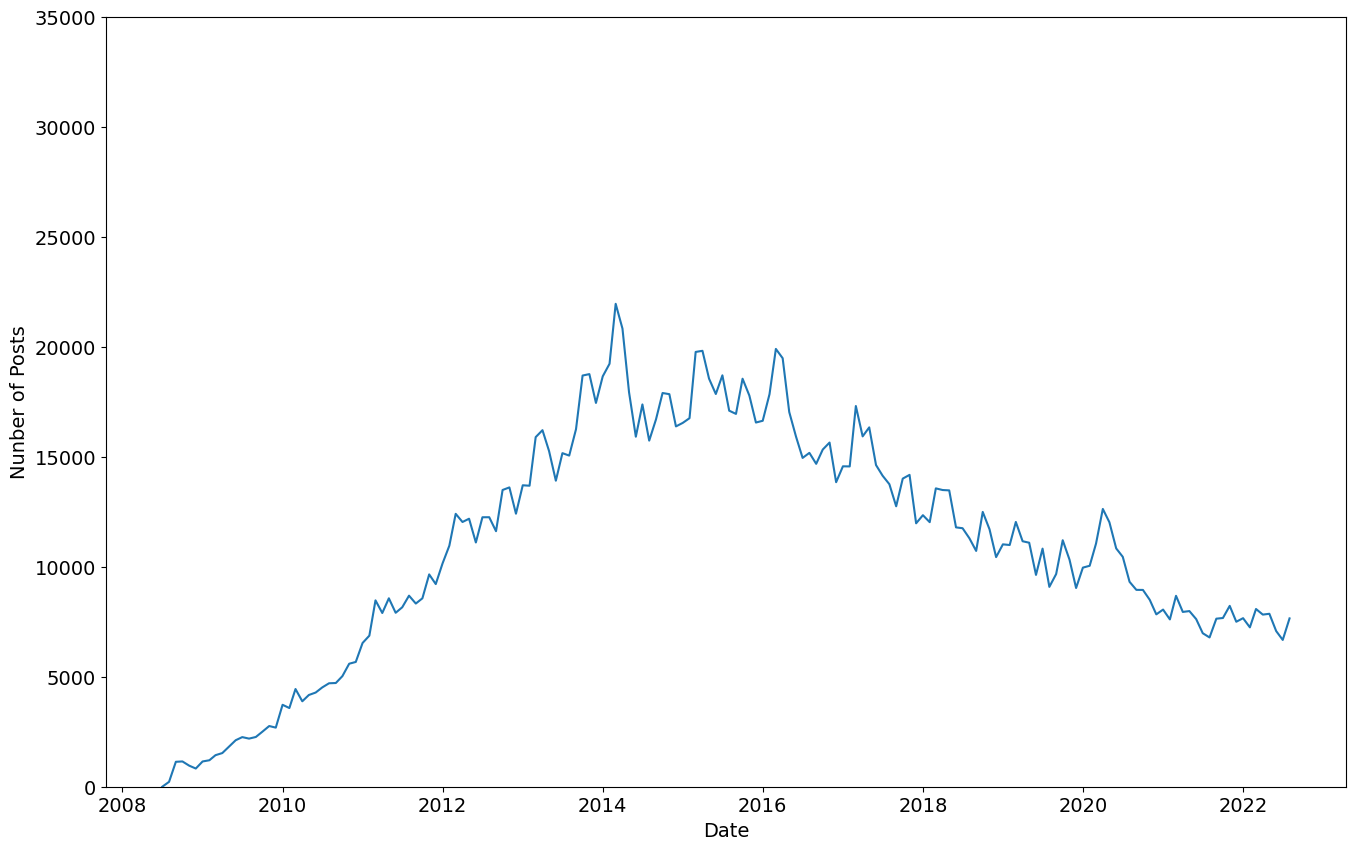

In [12]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nunber of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

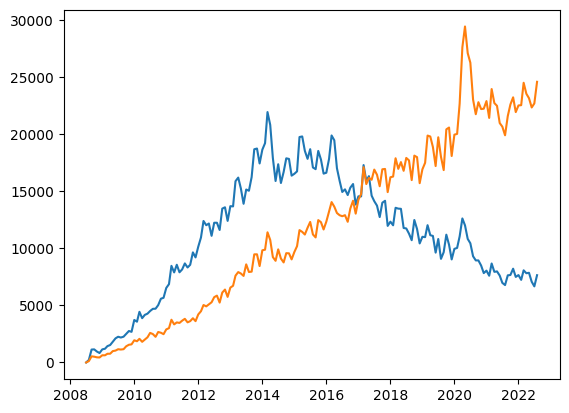

In [13]:
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.index, reshaped_df.python)

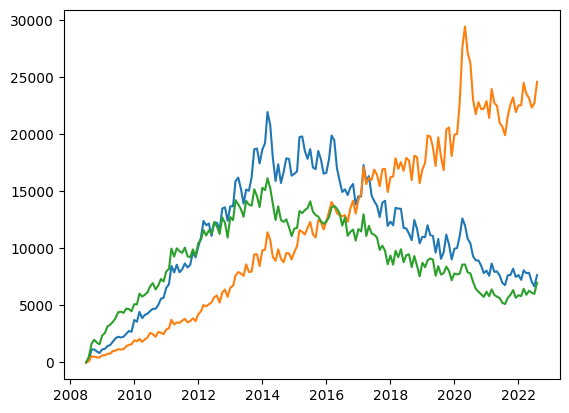

In [16]:
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.index, reshaped_df.python, reshaped_df.index, reshaped_df['c#'])

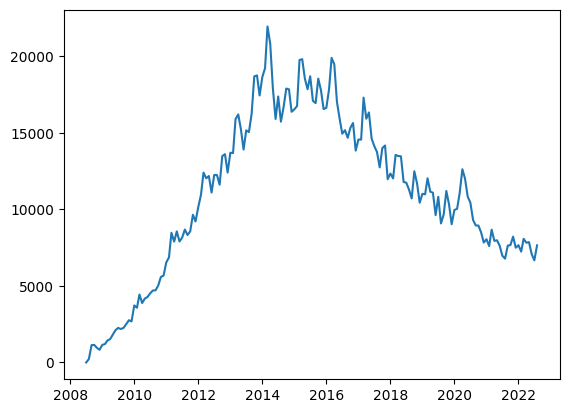

In [19]:
plt.plot(reshaped_df.java)

<AxesSubplot:xlabel='Date', ylabel='Number of Posts'>

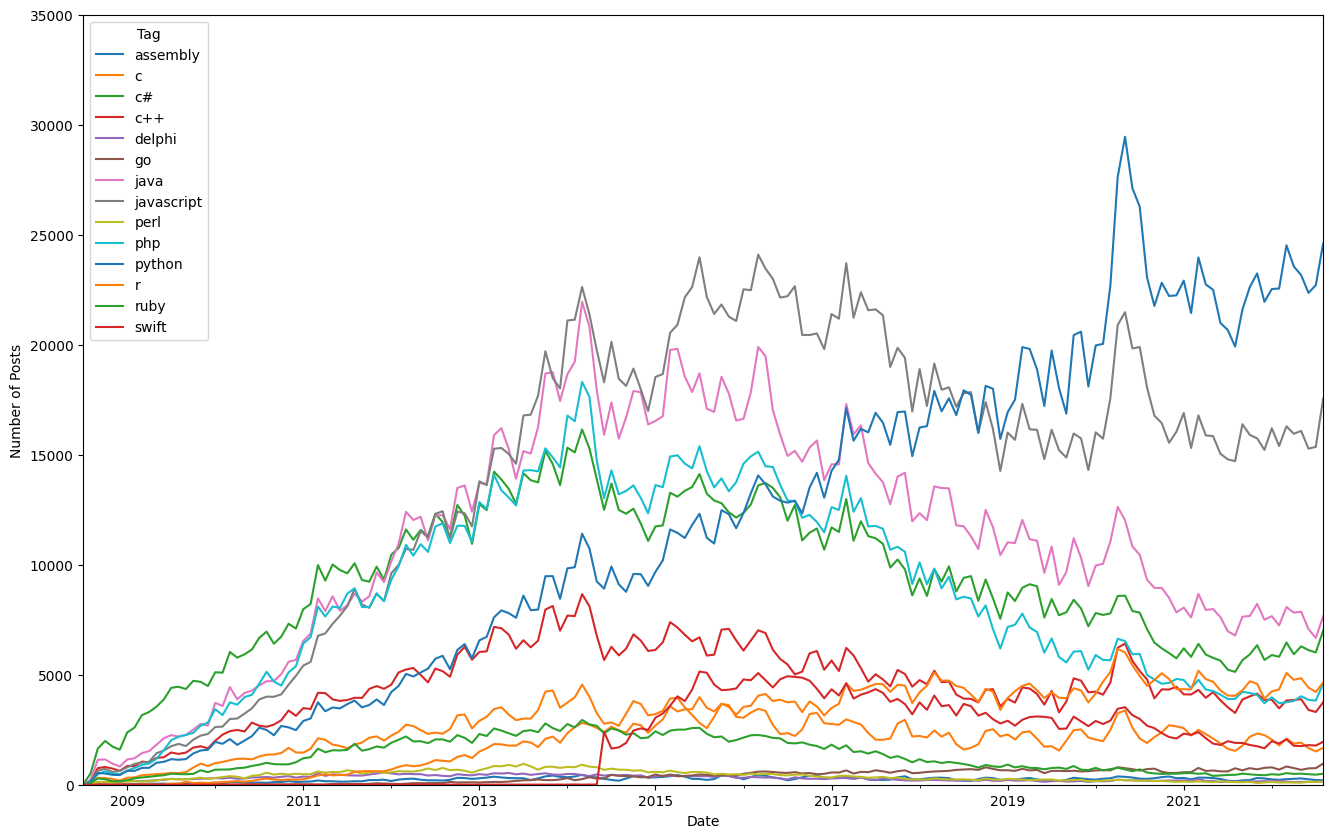

In [24]:

reshaped_df.plot(figsize=(16, 10), ylim=(0, 35000), xlabel='Date', ylabel='Number of Posts')

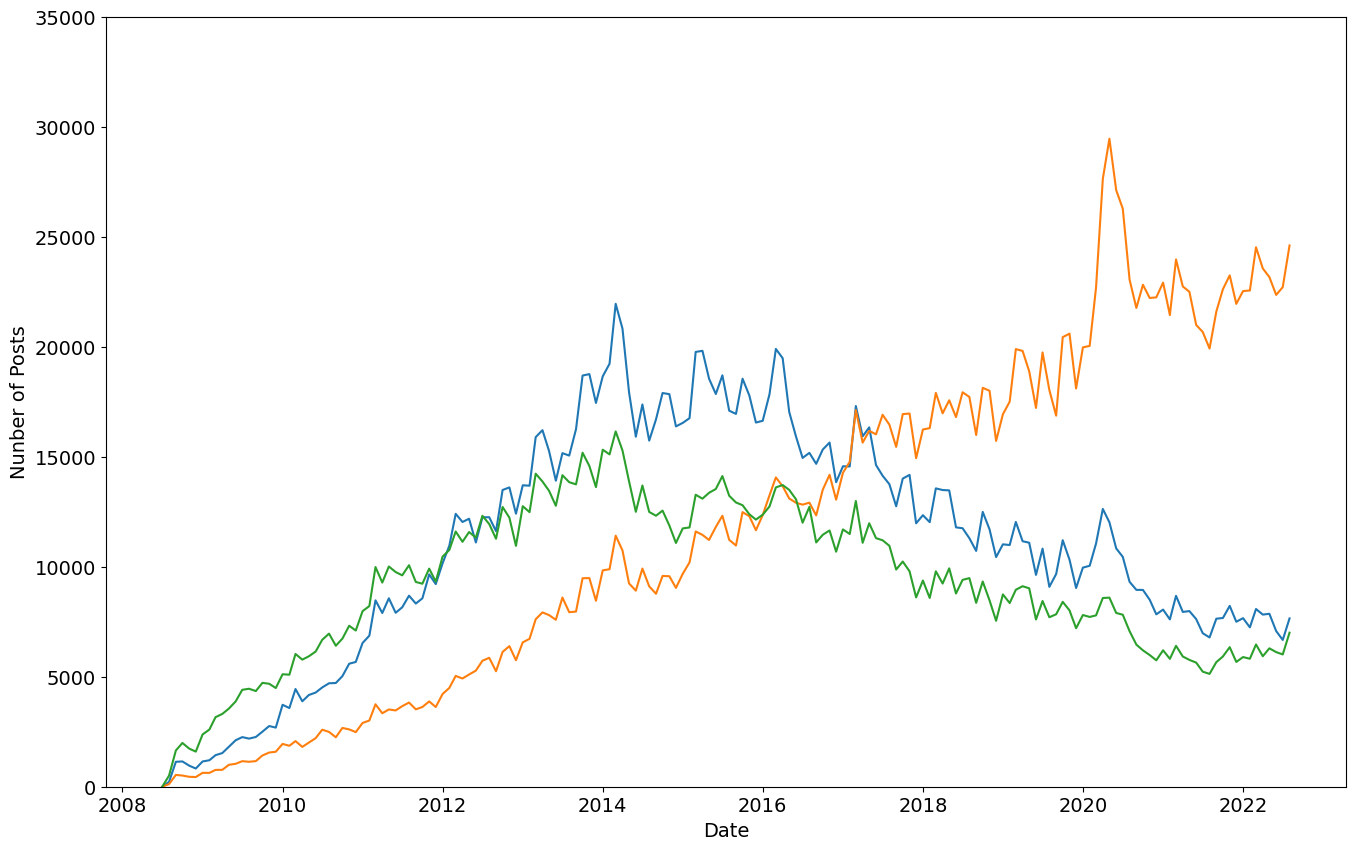

In [22]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nunber of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.java)
plt.plot(reshaped_df.python)
plt.plot(reshaped_df['c#'])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

<AxesSubplot:xlabel='Date', ylabel='Number of Posts'>

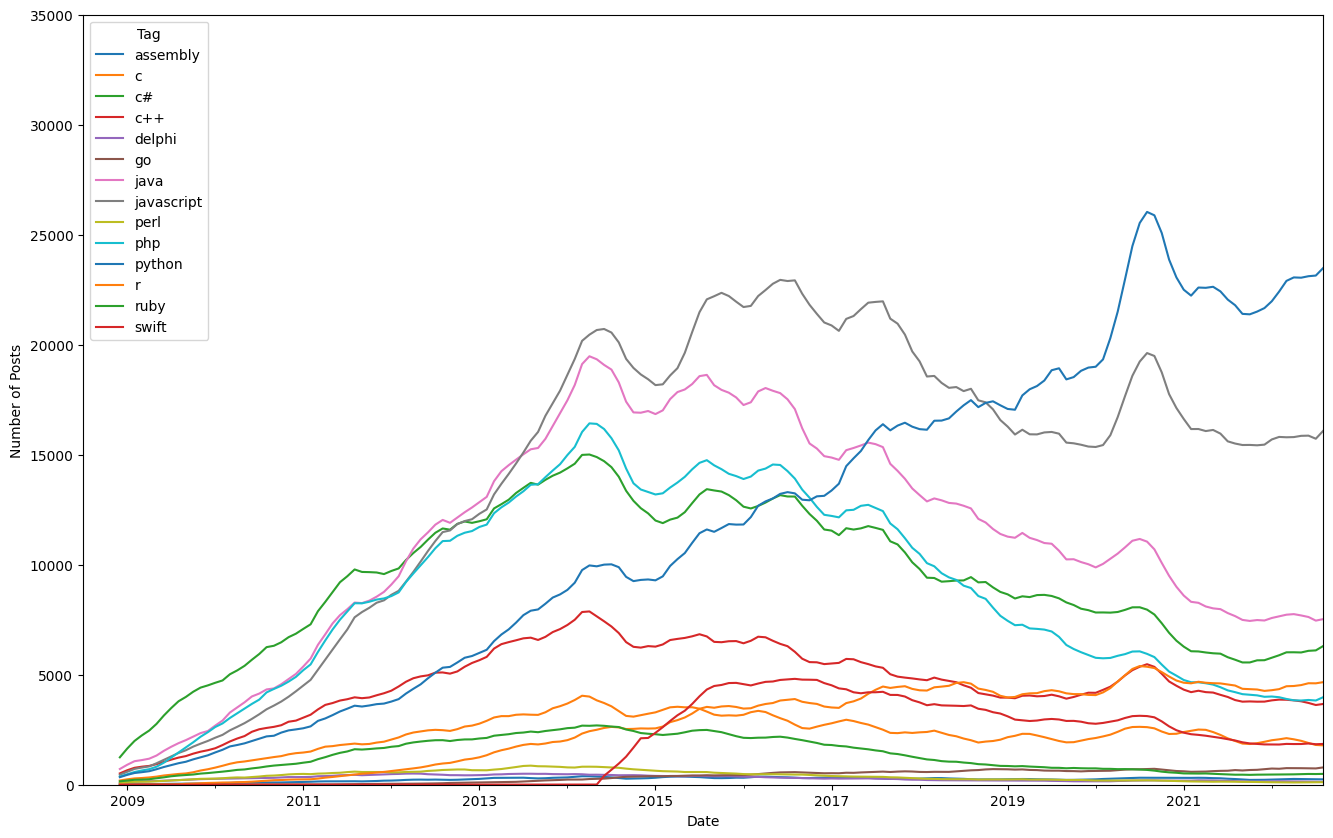

In [25]:
roll_df = reshaped_df.rolling(window=6).mean()
roll_df.plot(figsize=(16, 10), ylim=(0, 35000), xlabel='Date', ylabel='Number of Posts')

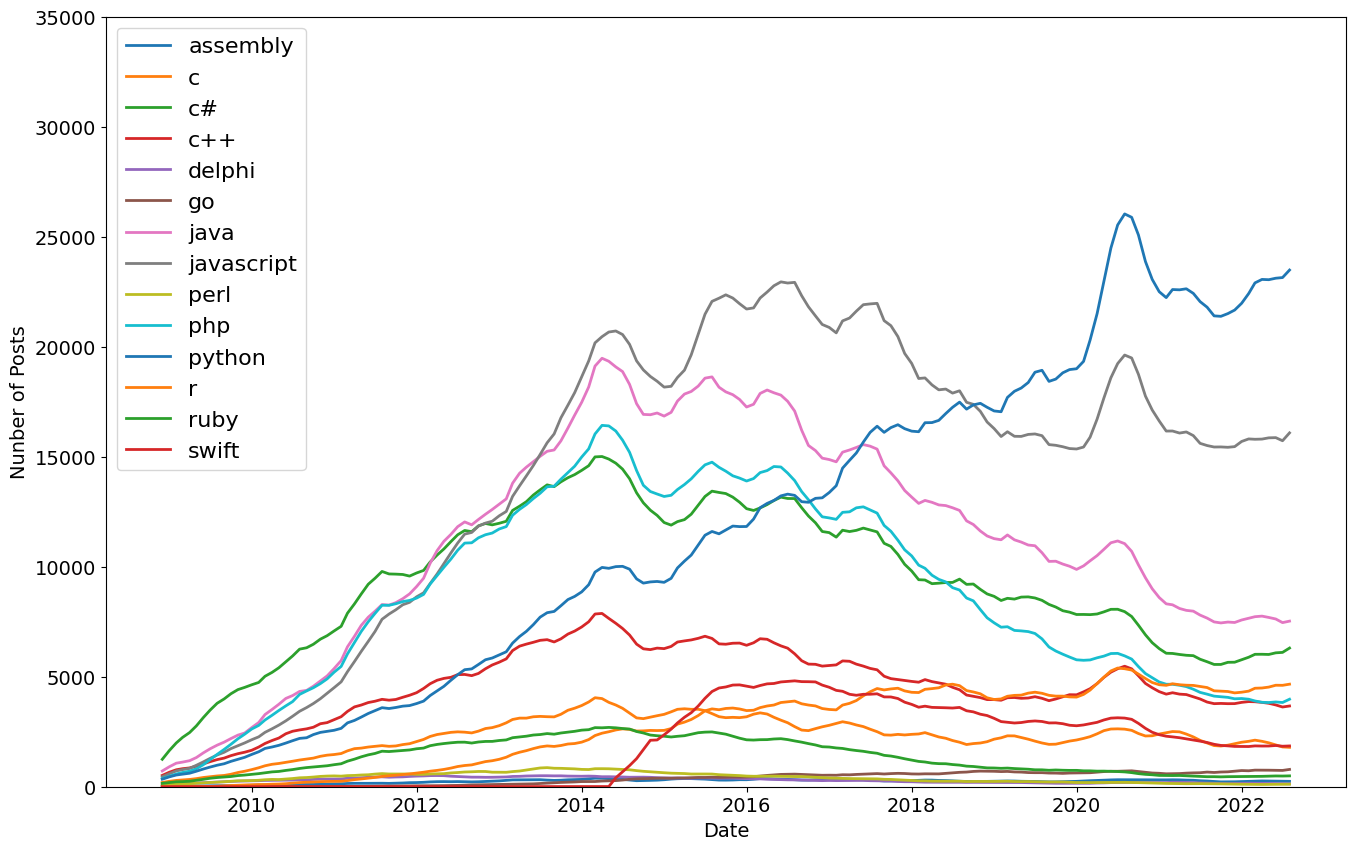

In [28]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nunber of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df[column], linewidth=2, label=roll_df[column].name)
plt.legend(fontsize=16)

<AxesSubplot:xlabel='Date', ylabel='Number of Posts'>

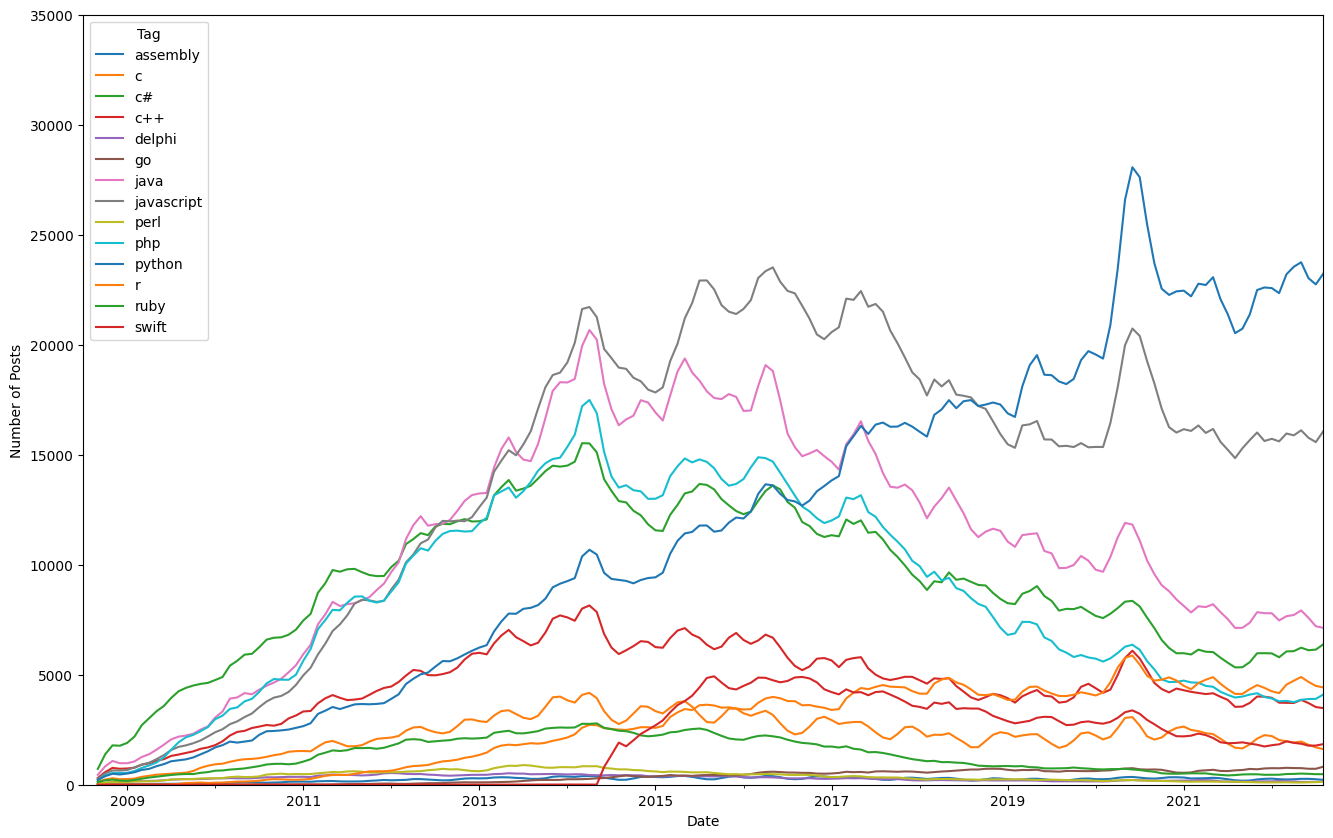

In [29]:
roll_df = reshaped_df.rolling(window=3).mean()
roll_df.plot(figsize=(16, 10), ylim=(0, 35000), ylabel='Number of Posts')

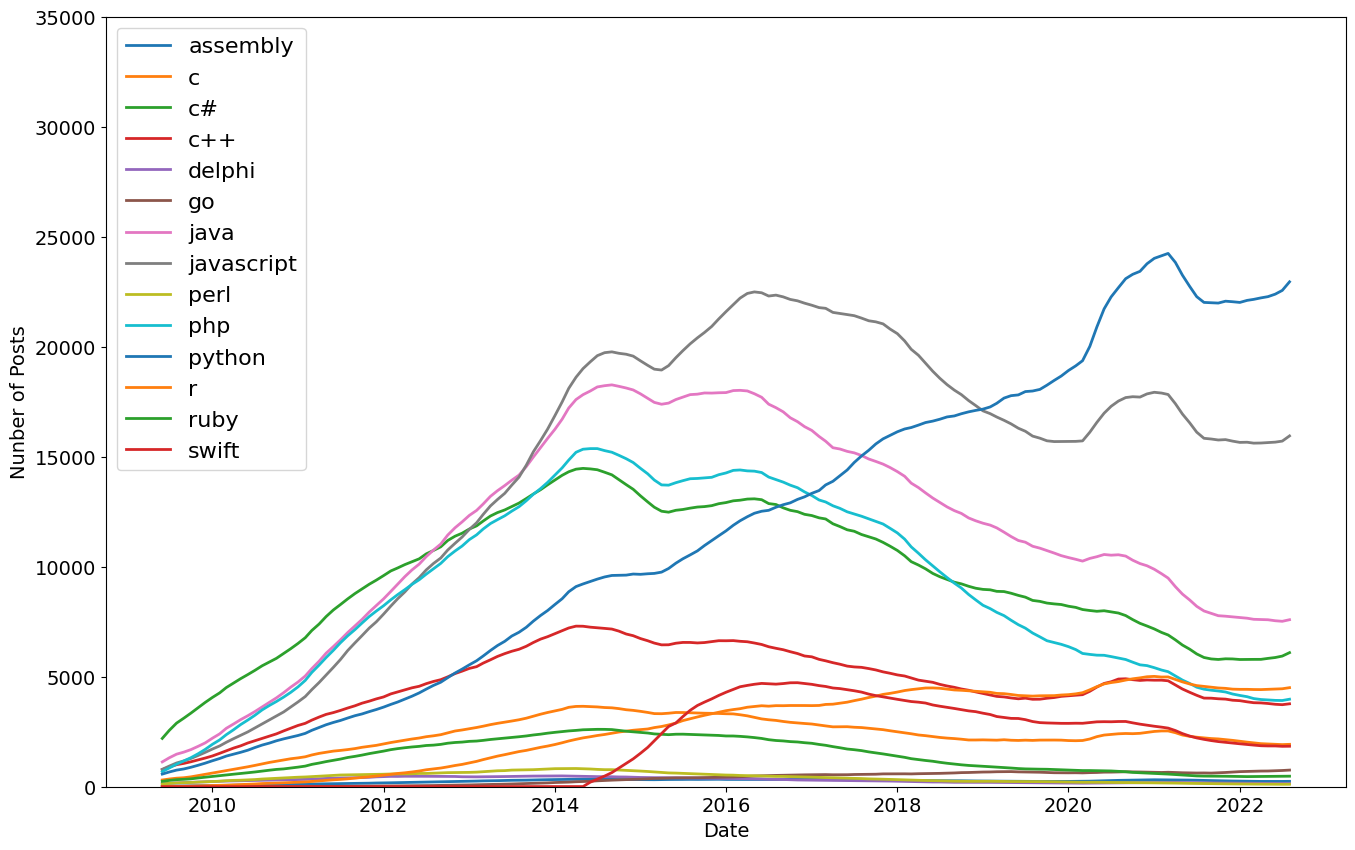

In [32]:
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nunber of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df[column], linewidth=2, label=roll_df[column].name)
plt.legend(fontsize=16)